In [1]:
import pandas as pd
import numpy as np


In [ ]:

######## import data 
#  remove zeros (data cleaning)

df = pd.read_csv('HKTop300YouTubers.csv', thousands=',')
df = df.iloc[:, 1:6]

df.rename( columns = {'subscribers': "subs", 
                      'video views': "view",
                      'video count': "count"}, 
          inplace = True)

## remove the zeros 
mask = np.all(df != 0, axis = 1)
df2 = df.loc[mask, :]



In [ ]:
## log transformation
dflog = df2[:]
dflog.iloc[:,1:4] = np.log(dflog.iloc[:,1:4])


(array([ 2.,  4.,  9., 37., 96., 60., 46., 25., 11.,  5.]),
 array([ 0.69314718,  1.74029117,  2.78743517,  3.83457916,  4.88172315,
         5.92886714,  6.97601113,  8.02315513,  9.07029912, 10.11744311,
        11.1645871 ]),
 <BarContainer object of 10 artists>)

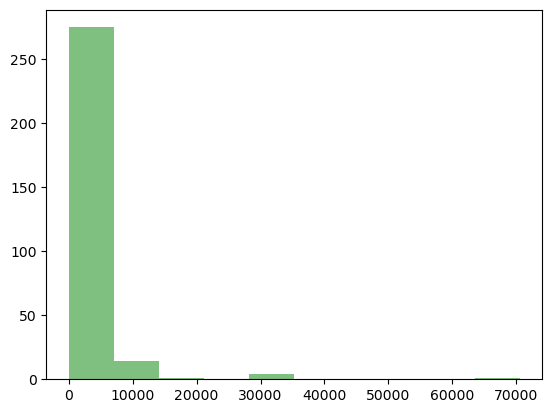

In [2]:
### draw historgram
import matplotlib.pyplot as plt

plt.hist(df2['count'], color='green', alpha=0.5)


(array([ 2.,  4.,  9., 37., 96., 60., 46., 25., 11.,  5.]),
 array([ 0.69314718,  1.74029117,  2.78743517,  3.83457916,  4.88172315,
         5.92886714,  6.97601113,  8.02315513,  9.07029912, 10.11744311,
        11.1645871 ]),
 <BarContainer object of 10 artists>)

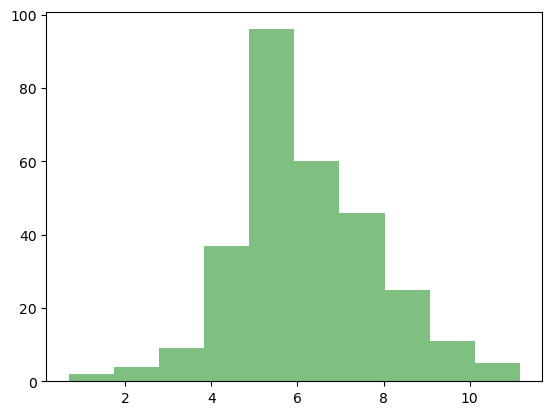

In [3]:
plt.hist(dflog['count'], color='green', alpha=0.5)

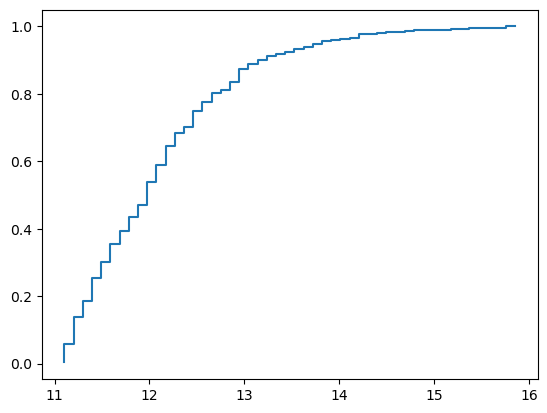

In [9]:
### draw ecdf
import statsmodels.api as sm
ecdf = sm.distributions.ECDF(dflog['subs'])

x = np.linspace(min(dflog['subs']), max(dflog['subs']))

plt.step(x, ecdf(x), label='ECDF')
plt.show()

In [10]:

### quantile
np.quantile( dflog['subs'], np.linspace(0.25, 0.75, num=3) )

array([11.48245297, 12.02574909, 12.5602383 ])

In [14]:
from scipy.stats import norm
norm.pdf(0)

0.3989422804014327

In [15]:
norm.cdf(1.96)

0.9750021048517795

In [16]:
norm.ppf(0.975)

1.959963984540054

In [17]:
np.random.randn(5)

array([-0.31384156, -0.51611384, -1.38568849, -1.49790259, -0.4386794 ])

In [19]:

np.mean(dflog['subs'])


12.158083091462446

In [20]:
np.var(dflog['subs'])


0.7209887637834421

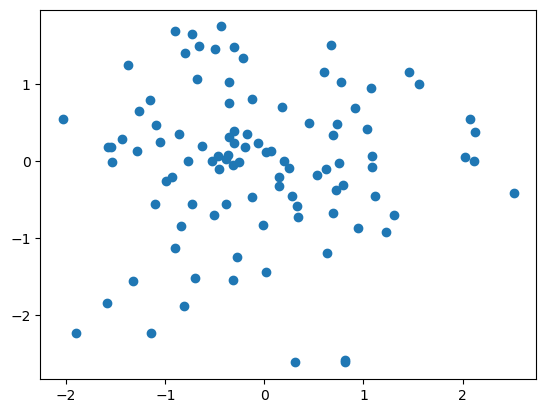

In [21]:
Y = np.random.randn(200).reshape(100,2)
plt.scatter(Y[:,0], Y[:,1])


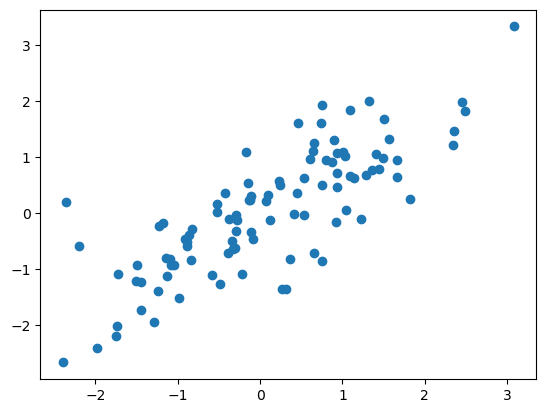

In [22]:
Y = np.random.randn(200).reshape(100,2) @ np.array([[1,0.5],[0.5,1]])
plt.scatter(Y[:,0], Y[:,1])

In [23]:
######save data file

mask = np.random.choice(np.arange(0, len(dflog)), size = 100, replace = False)
dflog_subsample = dflog.iloc[np.sort(mask), :]

dflog_subsample.to_csv('HK300_subsample.csv', index=False)
